In [121]:
import pandas as pd
import numpy as np
import glob
import os
import re
import math
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
import statistics
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import container
import matplotlib
%matplotlib widget

In [144]:
plt.rcParams.update({'font.size': 12})

In [170]:
pathL = Path('../data/raw/Loading/Ruby/')
pathUL = Path('../data/raw/Unloading/Ruby/')

In [171]:
data_dict = {}
for file in pathL.iterdir() :
    if str(file).endswith('.csv'):
        file_num = int(re.split('_', str(file.name))[0]) 
        data_dict[file_num] = pd.read_csv(
        file,
        delimiter='\t',
        usecols=[0, 1],
        skiprows=[0],
        names=['Wavelength','Intensity']
        ).dropna()
# for file in pathUL.iterdir() :
#     if str(file).endswith('.csv'): 
#         file_num = int(re.split('_', str(file.name))[0])
#         data_dict[file_num] = pd.read_csv(
#         file,
#         delimiter='\t',
#         usecols=[0, 1],
#         skiprows=[0],
#         names=['Wavelength','Intensity']
#         ).dropna()

In [172]:
data_dict.keys()

dict_keys([49, 34, 46, 50, 33])

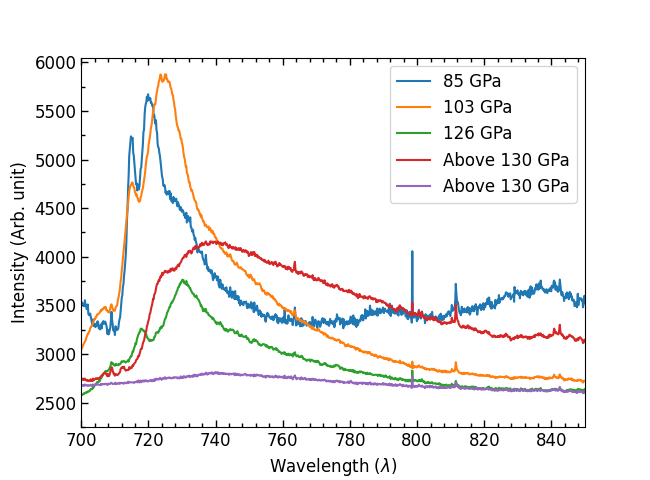

In [173]:
fig, ax = plt.subplots(figsize = (6.5,4.8))
labels  = ['85 GPa','103 GPa','126 GPa','Above 130 GPa','Above 130 GPa']
i =0
for file in [33,34,49,46,50]: #Plotting Unloading data files
        df = data_dict[file]
        ax.plot(df.Wavelength, df.Intensity, label= labels[i]) #Factor of 1000 to convert to mOhms resistance.
        i+=1
#ax.legend(title ='P (GPa), Unloading',bbox_to_anchor=(0.0, 0.3, 1., .102),loc = 'lower right', fontsize = 10, borderpad = 0.08, labelspacing = 0.2,ncol = 5).set_zorder(0)
ax.legend()
ax.yaxis.tick_left()
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_xlim(700, 850)
ax.tick_params(axis="both",which = 'major', direction="in", length=5, width=1, top = True,right = False)
ax.tick_params(axis="both",which = 'minor', direction="in", length=3, width=1, top = True, right = False)
ax.set_xlabel('Wavelength ($\lambda$)')
ax.set_ylabel('Intensity (Arb. unit)');

In [174]:
plt.savefig(r'/home/ad.ufl.edu/shubham.sinha/pdrive/ResLabs/HamlinLab/Users/Shubham_Sinha/dissertation/ruby_wPressure.pdf',bbox_inches='tight')

In [164]:
pathL = Path(r'/home/ad.ufl.edu/shubham.sinha/pdrive/ResLabs/HamlinLab/Shared/Shubham/5_QMoB2_Run1_20p0bar_12p7GPa_cooling_292p0K_laseron_V14I23_1mA_Vmode_1spectra')

In [165]:
data_dict = {}
for file in pathL.iterdir() :
    if str(file).endswith('.csv'):
        file_num = int(re.split('_', str(file.name))[0]) 
        data_dict[file_num] = pd.read_csv(
        file,
        delimiter='\t',
        usecols=[0, 1],
        skiprows=[0],
        names=['Wavelength','Intensity']
        ).dropna()

In [166]:
data_dict.keys()

dict_keys([1, 2, 3, 4])

Text(0, 0.5, 'Intensity (Arb. unit)')

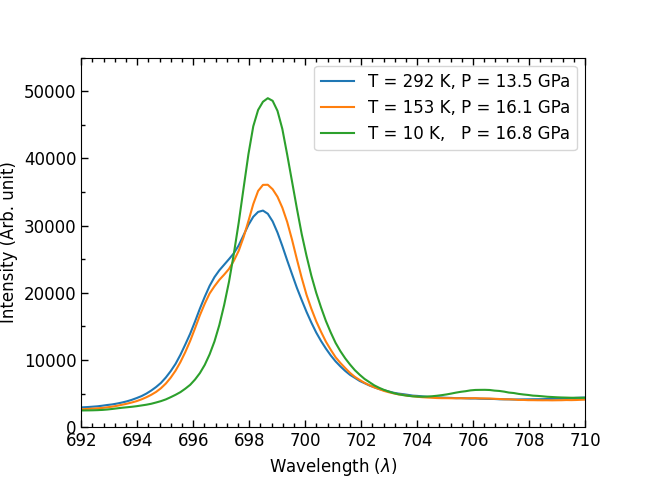

In [167]:
fig, ax = plt.subplots(figsize = (6.5,4.8))
labels = ['T = 292 K, P = 13.5 GPa', 'T = 153 K, P = 16.1 GPa', 'T = 10 K,   P = 16.8 GPa']
i =0
for file in [1,2,3]: #Plotting Unloading data files
        df = data_dict[file]
        ax.plot(df.Wavelength, df.Intensity, label = labels[i]) #Factor of 1000 to convert to mOhms resistance.
        i = i+1
#ax.legend(title ='P (GPa), Unloading',bbox_to_anchor=(0.0, 0.3, 1., .102),loc = 'lower right', fontsize = 10, borderpad = 0.08, labelspacing = 0.2,ncol = 5).set_zorder(0)
ax.set_ylim(0,55000)
ax.set_xlim(692, 710)
ax.yaxis.tick_left()
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.legend()
ax.tick_params(axis="both",which = 'major', direction="in", length=5, width=1, top = True,right = False)
ax.tick_params(axis="both",which = 'minor', direction="in", length=3, width=1, top = True, right = False)
ax.set_xlabel('Wavelength ($\lambda$)')
ax.set_ylabel('Intensity (Arb. unit)')

In [168]:
plt.savefig(r'/home/ad.ufl.edu/shubham.sinha/pdrive/ResLabs/HamlinLab/Users/Shubham_Sinha/dissertation/ruby_wTemperature.pdf',bbox_inches='tight')

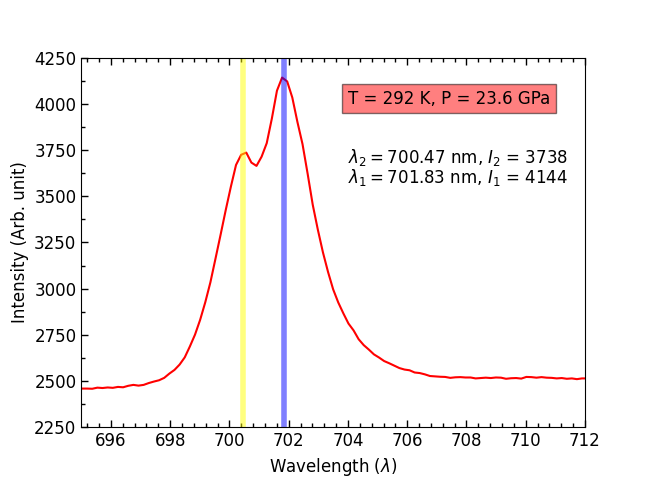

In [104]:
fig, ax = plt.subplots(figsize = (6.5,4.8))
labels = ['T = 292 K, P = 23.6 GPa', 'T = 153 K, P = 16.1 GPa', 'T = 10 K,   P = 16.8 GPa']
i =0
for file in [4]: #Plotting Unloading data files
        df = data_dict[file]
        ax.plot(df.Wavelength, df.Intensity, color = 'r', linewidth = 1.5,label = labels[i]) #Factor of 1000 to convert to mOhms resistance.
        i = i+1
#ax.legend(title ='P (GPa), Unloading',bbox_to_anchor=(0.0, 0.3, 1., .102),loc = 'lower right', fontsize = 10, borderpad = 0.08, labelspacing = 0.2,ncol = 5).set_zorder(0)
ax.set_ylim(2250,4250)
ax.set_xlim(695, 712)
ax.yaxis.tick_left()
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
#ax.legend()
ax.tick_params(axis="both",which = 'major', direction="in", length=5, width=1, top = True,right = False)
ax.tick_params(axis="both",which = 'minor', direction="in", length=3, width=1, top = True, right = False)
ax.set_xlabel('Wavelength ($\lambda$)')
ax.set_ylabel('Intensity (Arb. unit)')
ax.text( 704, 4000,'T = 292 K, P = 23.6 GPa',
        bbox=dict(facecolor='red', alpha=0.5))
ax.text(704,3682,'$\lambda_2 = 700.47$ nm, $I_2$ = 3738')
ax.text(704,3572,'$\lambda_1 = 701.83$ nm, $I_1$ = 4144')
ax.vlines(700.47,2250,4250,color = 'yellow',linestyle = 'solid', alpha = 0.5, linewidth = 4)
ax.vlines(701.83,2250,4250,color = 'blue',linestyle = 'solid', alpha = 0.5, linewidth = 4);

In [108]:
plt.close('all')

In [105]:
plt.savefig(r'/home/ad.ufl.edu/shubham.sinha/pdrive/ResLabs/HamlinLab/Users/Shubham_Sinha/dissertation/ruby_r1r2.pdf',bbox_inches='tight')

Plotting Pressure vs wavelength till 160 GPa

In [82]:
lam = np.linspace(693.75, 730,100)

In [83]:
P = (1876/10.71)*((lam/693.75)**10.71 - 1)

Text(695, 110, '$\\lambda_0$ = 693.75 nm \n T = 294.26 K')

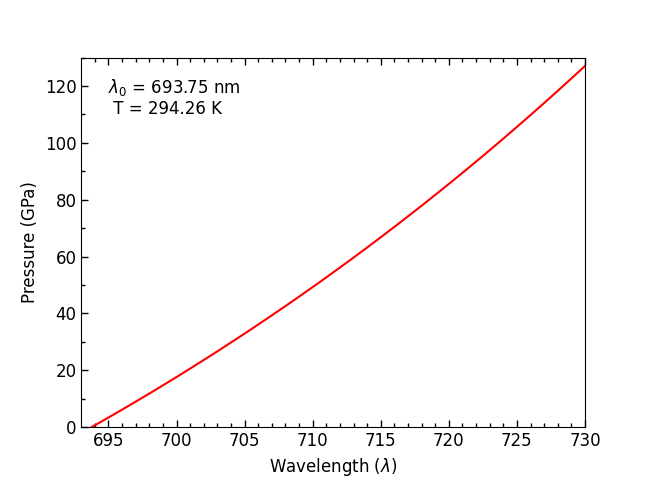

In [100]:
fig, ax = plt.subplots(figsize = (6.5,4.8))
ax.plot(lam, P, color = 'r', linewidth = 1.5) #Factor of 1000 to convert to mOhms resistance.
#ax.legend(title ='P (GPa), Unloading',bbox_to_anchor=(0.0, 0.3, 1., .102),loc = 'lower right', fontsize = 10, borderpad = 0.08, labelspacing = 0.2,ncol = 5).set_zorder(0)
ax.set_ylim(0, 130)
ax.set_xlim(693, 730)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
#ax.legend()
ax.tick_params(axis="both",which = 'major', direction="in", length=5, width=1, top = True,right = False)
ax.tick_params(axis="both",which = 'minor', direction="in", length=3, width=1, top = True, right = False)
ax.set_xlabel('Wavelength ($\lambda$)')
ax.set_ylabel('Pressure (GPa)')
ax.text(695, 110, "$\lambda_0$ = 693.75 nm \n T = 294.26 K")


In [101]:
plt.savefig(r'/home/ad.ufl.edu/shubham.sinha/pdrive/ResLabs/HamlinLab/Users/Shubham_Sinha/dissertation/pressureVSwavelength.pdf',bbox_inches='tight')